In [1]:
import os
import re
import tensorflow as tf
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt

## Make Predictions

In [2]:
model_path = "mining_detection_model.h5"
model = tf.keras.models.load_model(model_path)

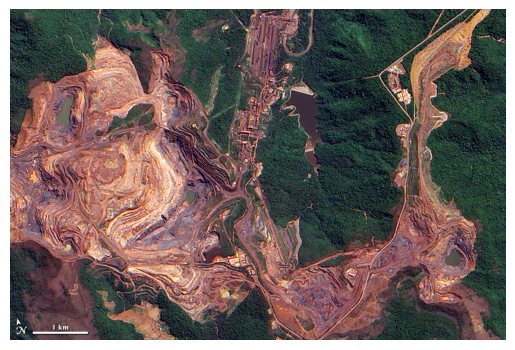

In [4]:
img_path = 'images/test/image10_1.jpg'
#img_path = 'images/dataset/No Mining/Forest_122.jpg'
original_img = tf.keras.preprocessing.image.load_img(img_path)
plt.imshow(original_img)
plt.axis('off')
plt.show()

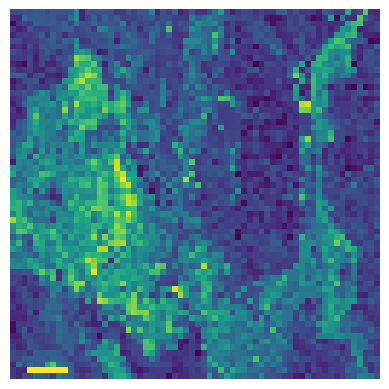

In [5]:
# gray_img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
# OR
gray_img = tf.image.rgb_to_grayscale(original_img)
gray_img = tf.image.resize(gray_img, (64, 64))
plt.imshow(gray_img)
plt.axis('off')
plt.show()

In [6]:
# Convert to array
img_array = tf.keras.preprocessing.image.img_to_array(gray_img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch
img_array.shape

TensorShape([1, 64, 64, 1])

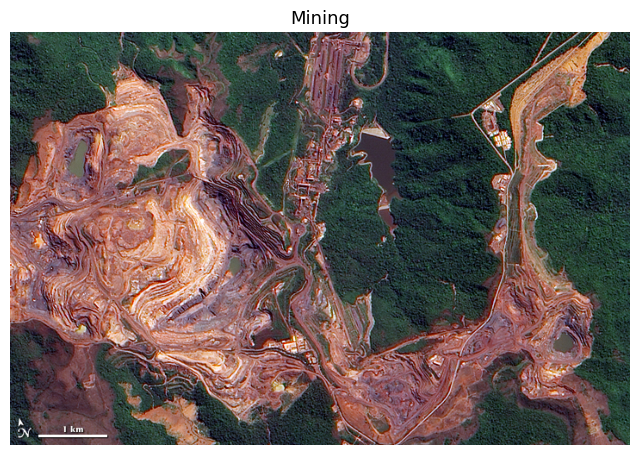

In [11]:
# Make prediction
result = model.predict(img_array, verbose=0)
#print(result)

# Get probabilities
probabilities = 1 / (1 + np.exp(-result))
#print(probabilities)

# Get prediction label
prediction = np.argmax(result, axis=1)[0]
class_names = ['Mining', 'No Mining']
#print(class_names[prediction])
#print(f"{probabilities[0][prediction]*100:.2f}%")

plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=0.4)
plt.imshow(original_img)
plt.title(class_names[prediction], fontdict={"fontsize": 13})
plt.axis("off")
plt.show()